In [74]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [15]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users_engagement = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')

In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
users_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


We want the Time data to be dtype datetime.

In [9]:
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit = 's')

In [10]:
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['creation_time'])

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [12]:
users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [13]:
users_engagement['time_stamp'] = pd.to_datetime(users_engagement['time_stamp'])
users_engagement = users_engagement.drop('visited', axis = 1)

In [14]:
users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.2 MB


In [17]:
users_engagement['wk'] = pd.to_datetime(user_engagement['time_stamp']).dt.week
df = users_engagement.groupby(['wk', 'user_id'])['time_stamp'].count().reset_index(name="freq")

result = df[df.freq >=3]

C:\Users\Ethan\AppData\Local\Temp\ipykernel_9496\1168867024.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  users_engagement['wk'] = pd.to_datetime(user_engagement['time_stamp']).dt.week


In [18]:
result.head()

,wk,user_id,freq
1,1,10,5
2,1,42,4
5,1,63,7
6,1,69,10
7,1,81,3


In [19]:
adopters = result['user_id'].unique()
len(adopters)

1445

In [20]:
adopters = pd.DataFrame(adopters, columns= ['user_id'])

In [21]:
adopters['adopters'] = 1

We have now defined and counted the Adopted Users per the company request and can proceed with joining the two tables.

In [22]:
adopters['object_id'] = adopters['user_id']

In [27]:
adopter_merged = pd.merge(adopters, users, on="object_id", how= "right")
adopter_merged.head(10)

,user_id,adopters,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,NaN,NaN,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2.0,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,NaN,NaN,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,NaN,NaN,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,NaN,NaN,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,NaN,NaN,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,NaN,NaN,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,NaN,NaN,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,NaN,NaN,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10.0,1.0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [28]:
adopter_merged.drop("user_id", axis=1, inplace=True)

In [29]:
adopter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adopters                    1445 non-null   float64
 1   object_id                   12000 non-null  int64  
 2   creation_time               12000 non-null  object 
 3   name                        12000 non-null  object 
 4   email                       12000 non-null  object 
 5   creation_source             12000 non-null  object 
 6   last_session_creation_time  8823 non-null   float64
 7   opted_in_to_mailing_list    12000 non-null  int64  
 8   enabled_for_marketing_drip  12000 non-null  int64  
 9   org_id                      12000 non-null  int64  
 10  invited_by_user_id          6417 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.1+ MB


In [30]:
adopter_merged['adopters']= adopter_merged['adopters'].fillna(0)

In [32]:
adopter_merged.isnull().sum()

adopters                         0
object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [33]:
adopter_merged['invited_by_user_id'] = adopter_merged['invited_by_user_id'].fillna(0)


In [34]:
adopter_merged['invited_by_user_id'] = adopter_merged['invited_by_user_id'].replace(np.nan, 0)
adopter_merged.loc[adopter_merged['invited_by_user_id'] != 0, 'invited_by_user_id'] = 1
adopter_merged.head()

,adopters,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,0.0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,1.0
1,1.0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,1.0
2,0.0,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1.0
3,0.0,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,1.0
4,0.0,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,1.0


In [35]:
adopter_merged['last_session_creation_time'] = adopter_merged['last_session_creation_time'].fillna(0)


In [36]:
adopter_merged.isnull().sum()

adopters                      0
object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

We have eliminated null values and introduced binary systems to indicate whether or not a user is an adopter or was invited by user ID.

In [42]:
adopter_merged['creation_time'] = pd.to_datetime(adopter_merged['creation_time'], infer_datetime_format=True)
adopter_merged['creation_time'] = datetime.now() - adopter_merged['creation_time']
adopter_merged['creation_time'] = adopter_merged['creation_time'].dt.days

In [86]:
adopter_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adopters                    12000 non-null  float64
 1   object_id                   12000 non-null  int64  
 2   creation_time               12000 non-null  int64  
 3   creation_source             12000 non-null  object 
 4   last_session_creation_time  12000 non-null  float64
 5   opted_in_to_mailing_list    12000 non-null  int64  
 6   enabled_for_marketing_drip  12000 non-null  int64  
 7   org_id                      12000 non-null  int64  
 8   invited_by_user_id          12000 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 1.2+ MB


<AxesSubplot:>

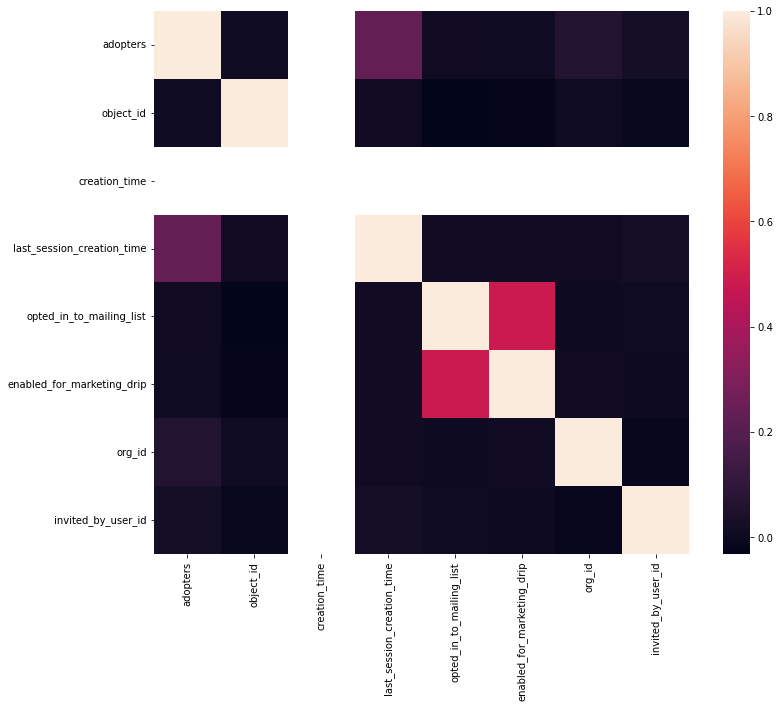

In [69]:
plt.subplots(figsize=(12,10))
sns.heatmap(adopter_merged.corr())

In [87]:
adopter_merged.drop("name", axis=1, inplace=True)
adopter_merged.drop("email", axis=1, inplace=True)


KeyError: "['name'] not found in axis"

In [88]:
adopter_merged.drop("creation_source", axis=1, inplace=True)

In [89]:
X = adopter_merged.drop(columns = ['adopters','last_session_creation_time'], axis=1)
y = adopter_merged['adopters']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [90]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [91]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)
y_pred = model.predict(X_train)

C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [92]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.00      0.00      7920
         1.0       0.12      1.00      0.21      1080

    accuracy                           0.12      9000
   macro avg       0.51      0.50      0.11      9000
weighted avg       0.81      0.12      0.03      9000



In [93]:
y_pred = model.predict(X_test)

C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [94]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00      2635
         1.0       0.12      1.00      0.22       365

    accuracy                           0.12      3000
   macro avg       0.56      0.50      0.11      3000
weighted avg       0.89      0.12      0.03      3000



In [98]:
rf = RandomForestClassifier(n_estimators= 2000,
 min_samples_split= 5,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 10,
 bootstrap= True).fit(X_train, y_train)

In [99]:
y_pred = rf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      7920
         1.0       1.00      0.00      0.01      1080

    accuracy                           0.88      9000
   macro avg       0.94      0.50      0.47      9000
weighted avg       0.89      0.88      0.83      9000



In [100]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94      2635
         1.0       0.00      0.00      0.00       365

    accuracy                           0.88      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.77      0.88      0.82      3000



C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ethan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
gb = GradientBoostingClassifier(n_estimators=50, max_features=2, learning_rate = 0.5,
                                random_state = 42, min_samples_split = 41, min_samples_leaf = 8, max_depth = 2).fit(X_train, y_train)

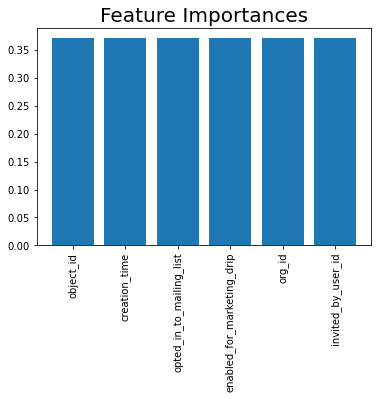

In [103]:

importances = pd.DataFrame(data={
    'Attribute': X_test.columns,
    'Importance': gb.feature_importances_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature Importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

The takeaway here is somewhat vague. There isn't a clear feature besides "Last Session Creation Time" with a correlation with becoming an adopter, and even that was of limited determination. 